In [73]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import metrics
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier


Import du jeu de données

In [3]:
iris=pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
for col in iris.select_dtypes('object'):
    print(f"{col:-<50} {iris[col].unique()}")

Species------------------------------------------- ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Vérification des Valeurs nulles

In [5]:
iris.isnull().sum()
# data.info()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
""" Aucune valeur nulle à noter
    On a 4 colonnes de types numériques et une de type catégorique
"""

' Aucune valeur nulle à noter\n    On a 4 colonnes de types numériques et une de type catégorique\n'

In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# Supprimons la colonne ID
columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
iris=iris[columns]
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Nombre d'exemples par espèce

In [9]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
""" 
Chaque espèce compte 50 exemples
"""

' \nChaque espèce compte 50 exemples\n'

Visualisation de données

Analyse basée sur la longueur et le poids des Sepal

<AxesSubplot: title={'center': 'Comparaison Basée sur le poids et la longueur des Sepal des différents espèces'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

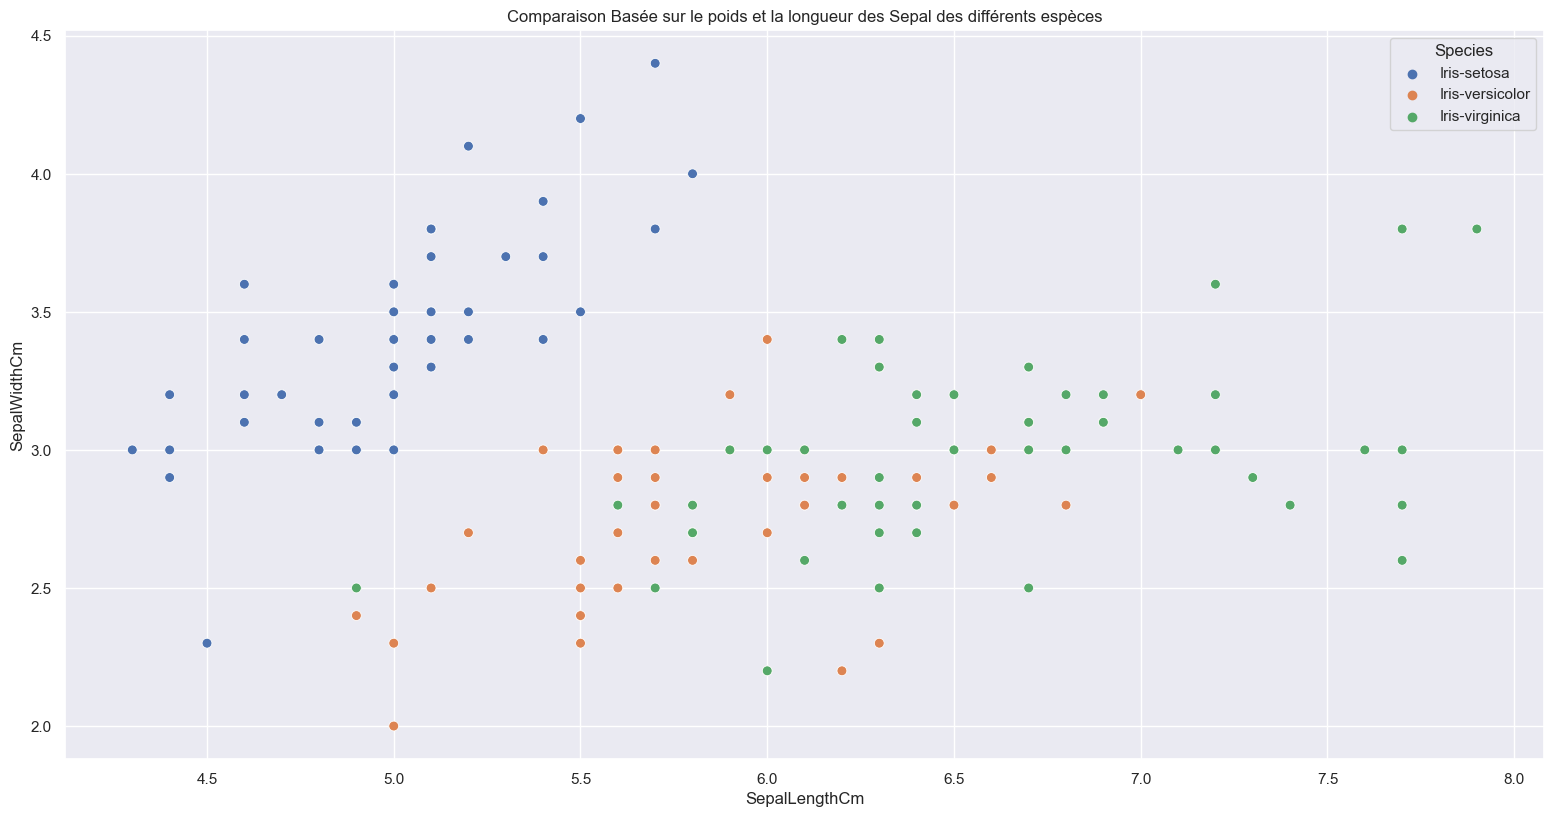

In [11]:
plt.figure(figsize=(17,9))
plt.title('Comparaison Basée sur le poids et la longueur des Sepal des différents espèces')
sns.scatterplot(x=iris['SepalLengthCm'],y=iris['SepalWidthCm'],hue =iris['Species'],s=50)

In [12]:
""" 
Setosa possède les plus courts et plus lourds Sepal.
Versicolor a les Sepals de taille et poids moyen.
Virginica a les Sepals les plus longs avec un poids moyen
"""

' \nSetosa possède les plus courts et plus lourds Sepal.\nVersicolor a les Sepals de taille et poids moyen.\nVirginica a les Sepals les plus longs avec un poids moyen\n'

Analyse basée sur la longueur et la largeur des Pepal

<AxesSubplot: title={'center': 'Comparaison Basée sur le poids et la longueur des Sepal des différents espèces'}, xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

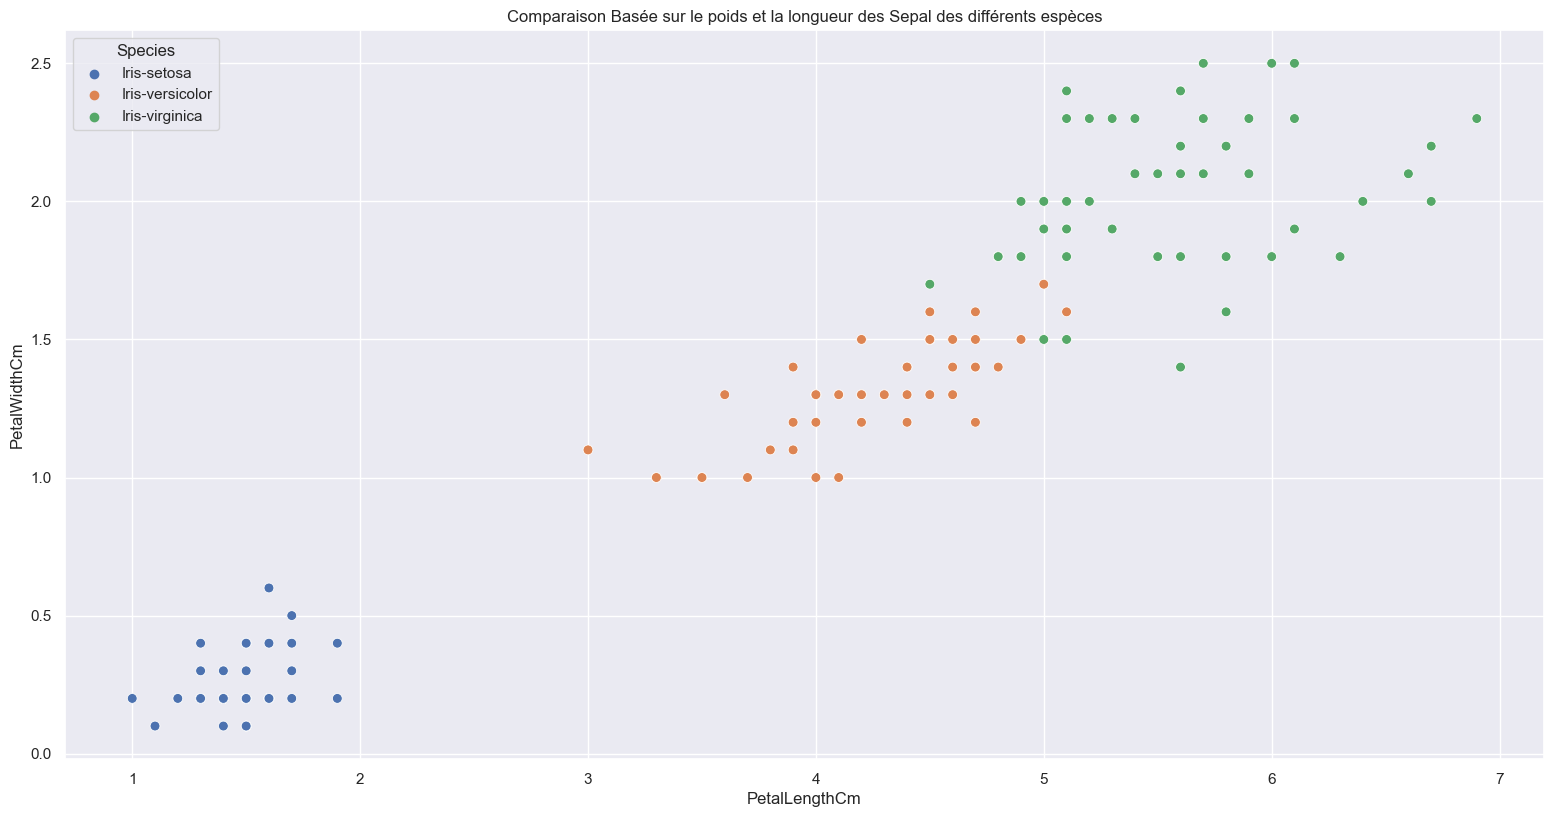

In [13]:
plt.figure(figsize=(17,9))
plt.title('Comparaison Basée sur le poids et la longueur des Sepal des différents espèces')
sns.scatterplot(x=iris['PetalLengthCm'],y=iris['PetalWidthCm'],hue =iris['Species'],s=50)

In [14]:
"""
L'spèce Setosa à les plus  courtes longueurs de Petal et les plus petites largeurs.
L'espèce Versicolor possède des Pepals avec un Sepales de taille moyen.
Virginica possède les plus longs Petals et les plus larges.
"""

"\nL'spèce Setosa à les plus  courtes longueurs de Petal et les plus petites largeurs.\nL'espèce Versicolor possède des Pepals avec un Sepales de taille moyen.\nVirginica possède les plus longs Petals et les plus larges.\n"

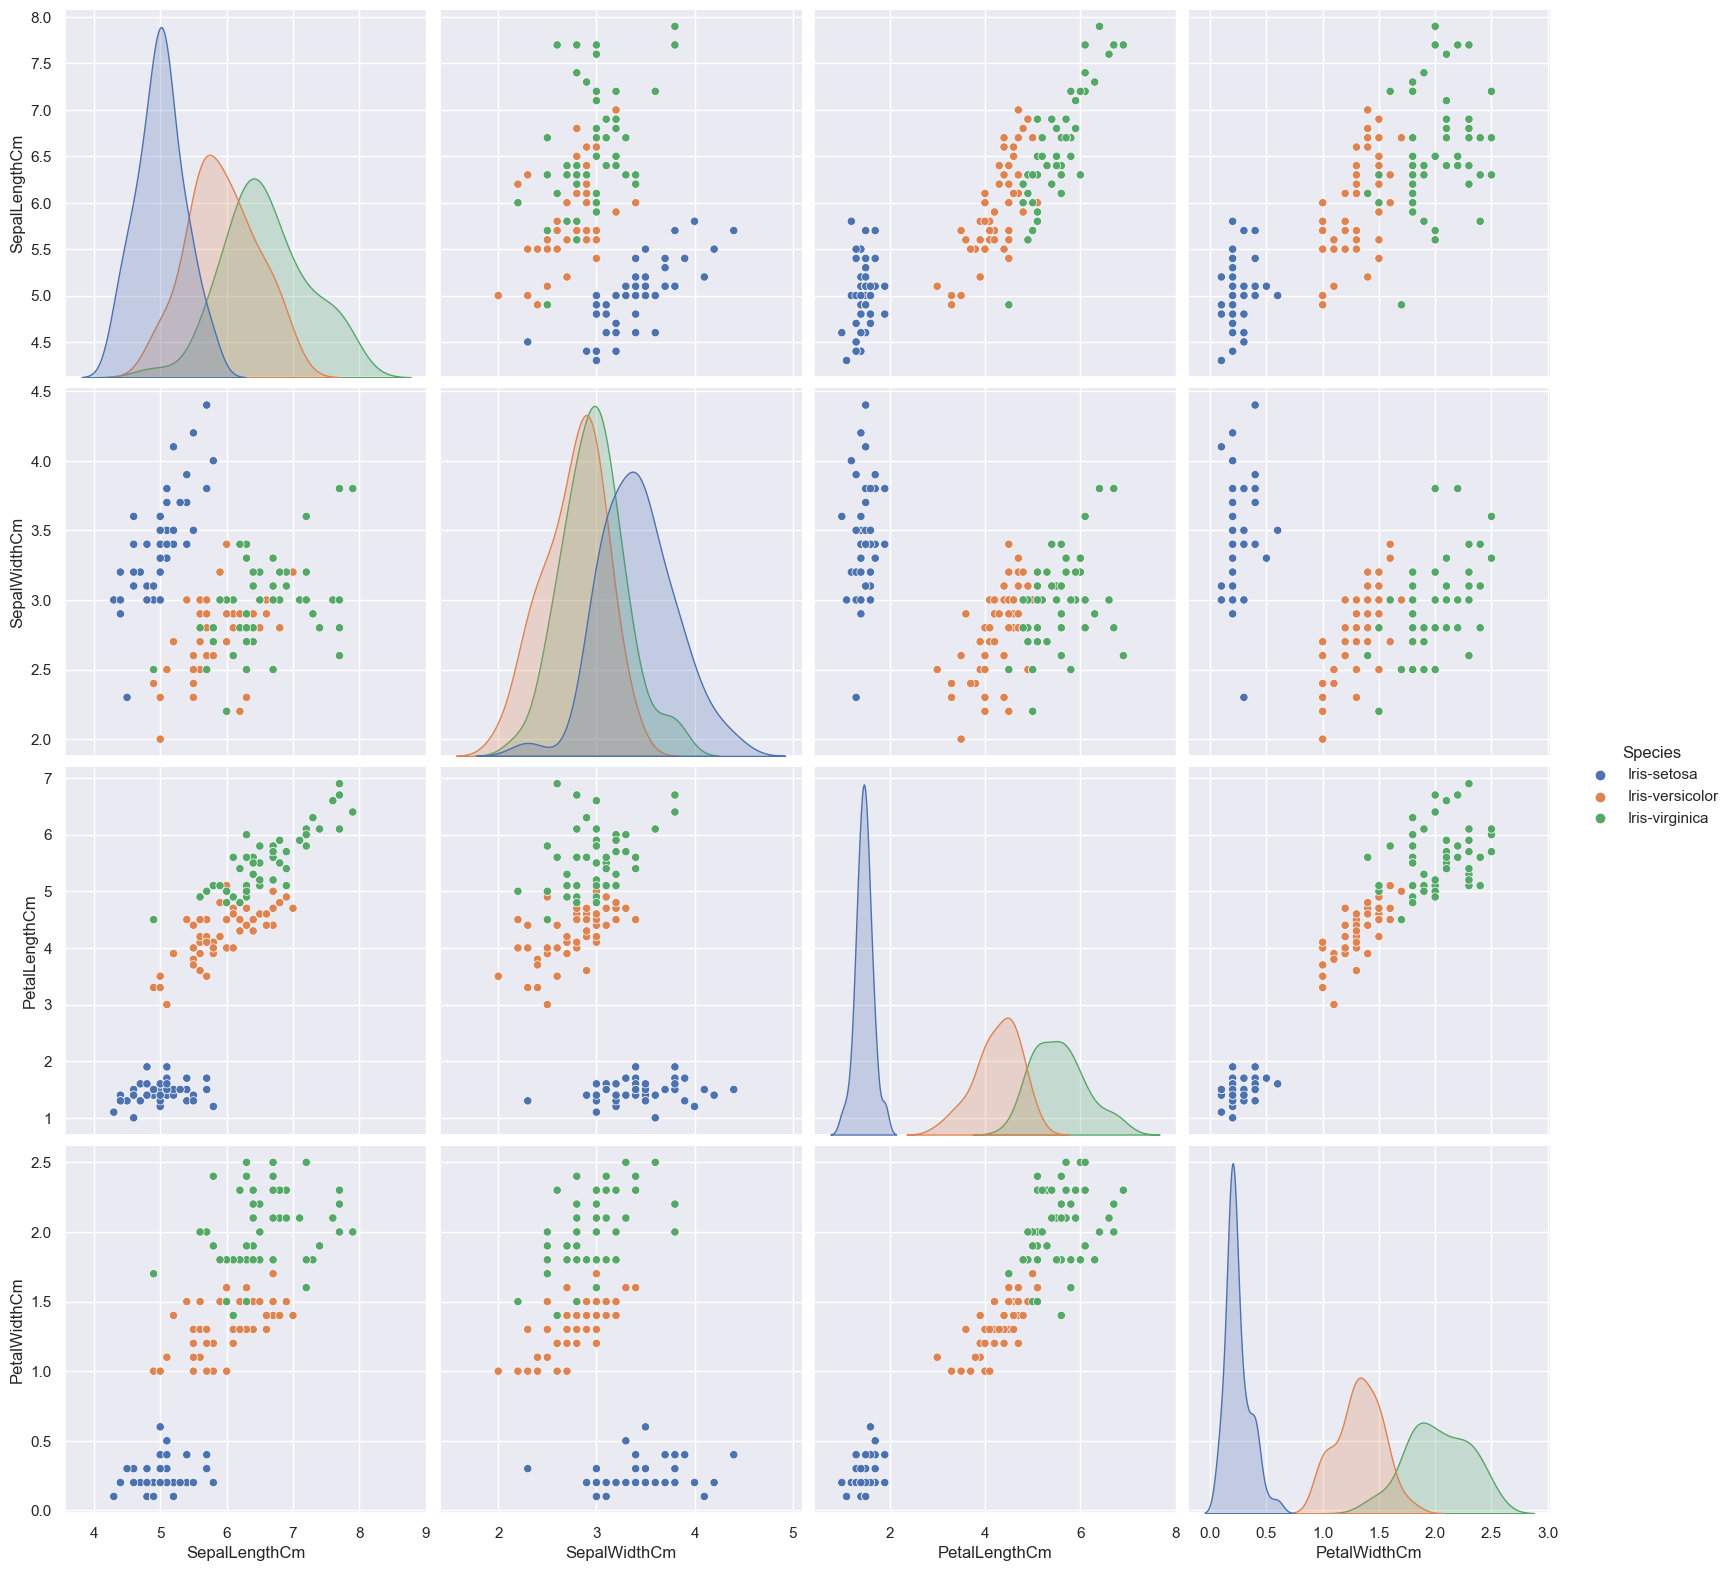

In [15]:
sns.pairplot(iris,hue='Species',height=4)

In [16]:
""" 
Seotsa a la plus petite largeur et longueur de pétales.
Il a également la plus petite longueur de sépale mais des largeurs de sépales plus grandes.
"""

' \nSeotsa a la plus petite largeur et longueur de pétales.\nIl a également la plus petite longueur de sépale mais des largeurs de sépales plus grandes.\n'

Histogrammes

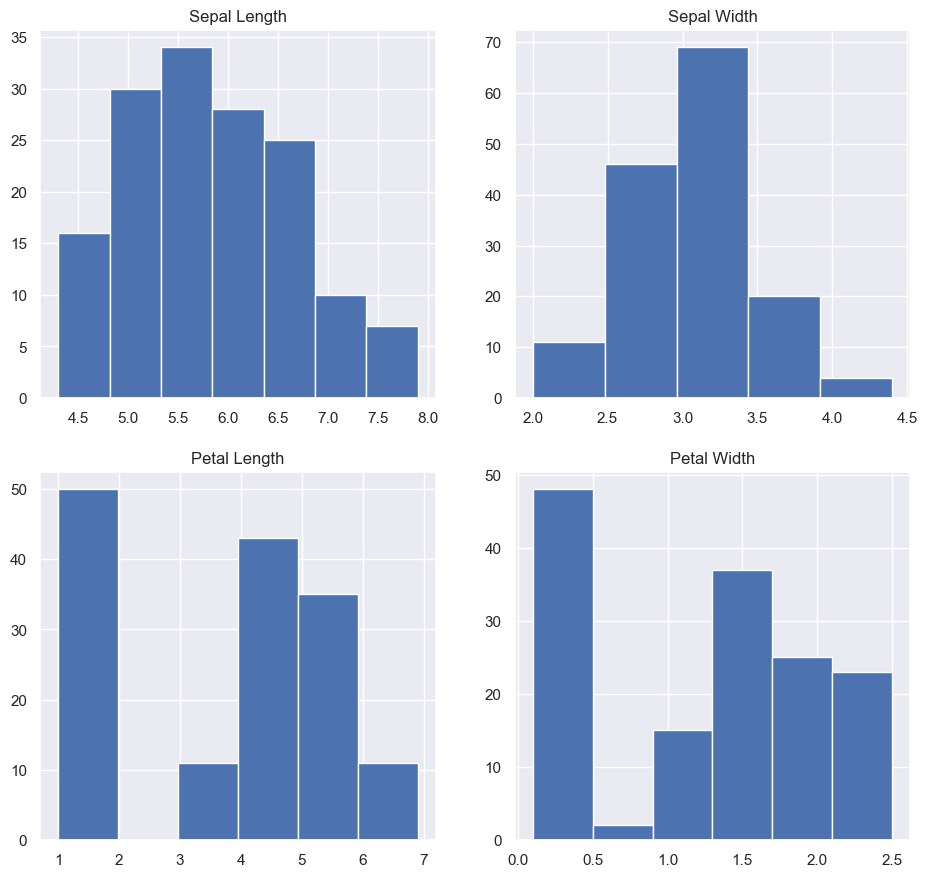

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
  
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(iris['SepalLengthCm'], bins=7)
  
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(iris['SepalWidthCm'], bins=5);
  
axes[1,0].set_title("Petal Length")
axes[1,0].hist(iris['PetalLengthCm'], bins=6);
  
axes[1,1].set_title("Petal Width")
axes[1,1].hist(iris['PetalWidthCm'], bins=6);

In [18]:
""" 
La fréquence la plus élevée de la longueur des sépales se situe entre 30 et 35 soit entre 5,5 et 6
La fréquence la plus élevée de la largeur des sépales est d’environ 70, soit entre 3,0 et 3,5
La fréquence la plus élevée de la longueur des pétales est d’environ 50 qui se situe entre 1 et 2
La fréquence la plus élevée de la largeur des pétales se situe entre 40 et 50, soit entre 0,0 et 0,5
"""

' \nLa fréquence la plus élevée de la longueur des sépales se situe entre 30 et 35 soit entre 5,5 et 6\nLa fréquence la plus élevée de la largeur des sépales est d’environ 70, soit entre 3,0 et 3,5\nLa fréquence la plus élevée de la longueur des pétales est d’environ 50 qui se situe entre 1 et 2\nLa fréquence la plus élevée de la largeur des pétales se situe entre 40 et 50, soit entre 0,0 et 0,5\n'

Histogrammes avec Distplot Plot

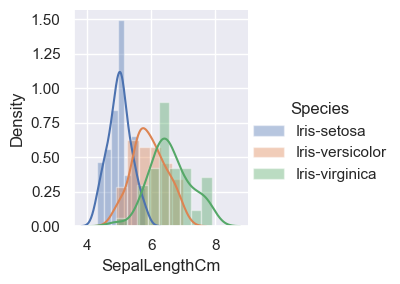

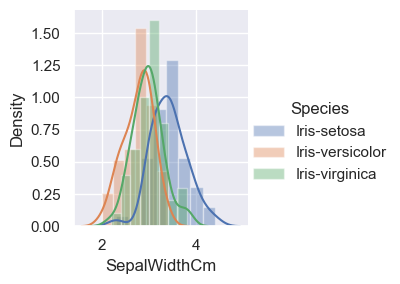

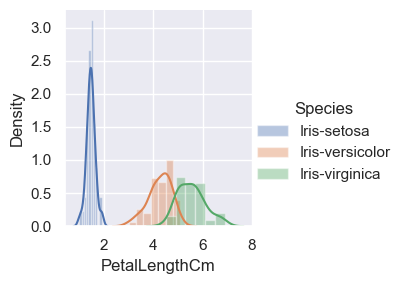

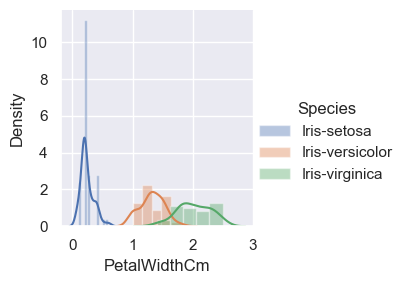

In [19]:
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.distplot, "SepalLengthCm").add_legend()
  
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.distplot, "SepalWidthCm").add_legend()
  
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.distplot, "PetalLengthCm").add_legend()
  
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.distplot, "PetalWidthCm").add_legend()
  
plt.show()

In [20]:
""" 
On note beaucoup de chevauchement au niveau de la longueur et de la largeur des Sepales
Il y a très peu de chevauchement au niveau de la longueur et de la largeur des Petales

On utilisera la longueur et la largeur des pétales comme fonction de classification.
"""

' \nOn note beaucoup de chevauchement au niveau de la longueur et de la largeur des Sepales\nIl y a très peu de chevauchement au niveau de la longueur et de la largeur des Petales\n\nOn utilisera la longueur et la largeur des pétales comme fonction de classification.\n'

Corrélation

[]

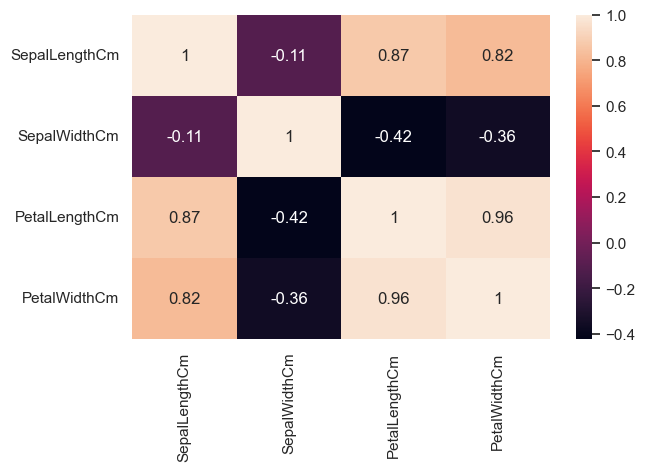

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(iris.corr(),annot=True)
plt.plot()

In [22]:
""" 
La largeur et la longueur des pétales ont des corrélations élevées. 
La longueur des pétales et la largeur des sépales ont de bonnes corrélations.
La largeur des pétales et la longueur des sépales ont de bonnes corrélations.

"""

' \nLa largeur et la longueur des pétales ont des corrélations élevées. \nLa longueur des pétales et la largeur des sépales ont de bonnes corrélations.\nLa largeur des pétales et la longueur des sépales ont de bonnes corrélations.\n\n'

Detecter et gerer les valeurs aberrantes

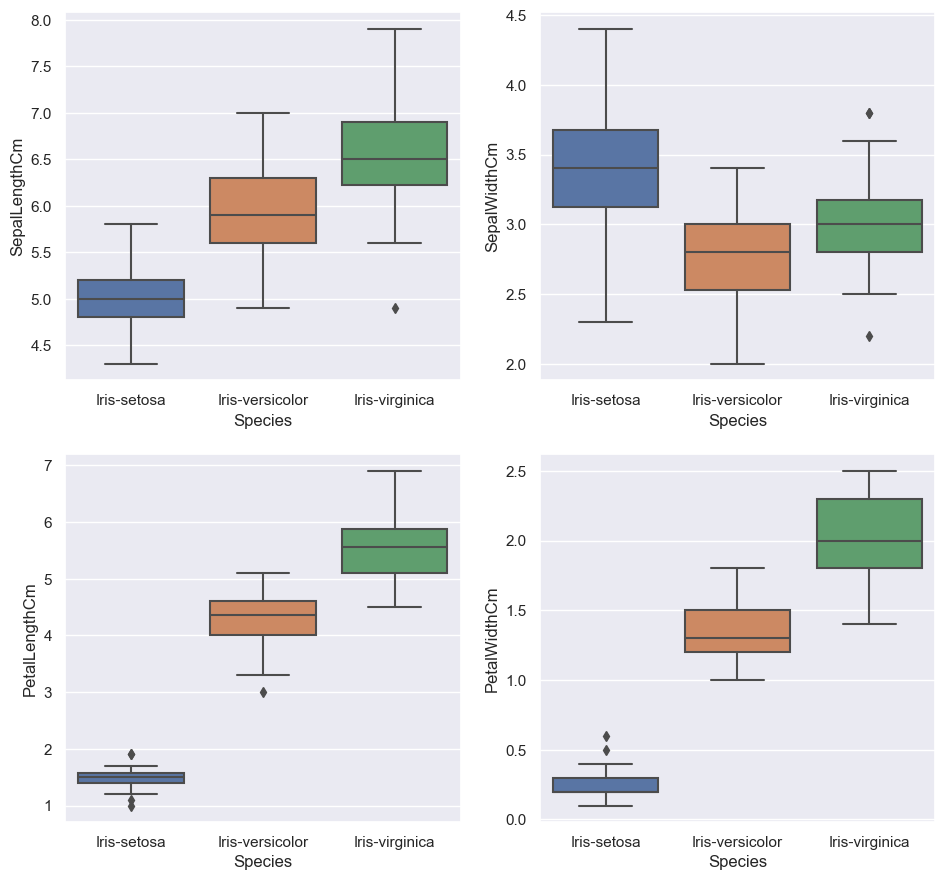

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
  
def graph(y):
    sns.boxplot(x="Species", y=y, data=iris)
  
plt.figure(figsize=(10,10))
      
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')
  
plt.subplot(222)
graph('SepalWidthCm')
  
plt.subplot(223)
graph('PetalLengthCm')
  
plt.subplot(224)
graph('PetalWidthCm')
  
plt.show()

In [24]:
"""" 
Les graphes montrent que Setosa a les plus petites caractéristiques avec quelques valeurs aberrantes.
Versicolor a les caractéristiques moyennes et présente une valeur aberrante.
Virginica Présente les caractéristiques les plus élevées et a également quelques valeurs aberranes.

"""

'" \nLes graphes montrent que Setosa a les pluspetites caractéristiques avec quelques valeurs aberrantes.\nVersicolor a les caractéristiques moyennes et présente une valeur aberrante.\nVirginica Présente les caractéristiques les plus élevées et a également quelques valeurs aberranes.\n\n'

Suppression des valeurs aberrantes

In [29]:
# IQR
# 'SepalWidthCm','SepalWidthCm','SepalWidthCm','SepalWidthCm'
features = ['SepalWidthCm','SepalWidthCm','SepalWidthCm','SepalWidthCm']

def impute_outliers(df, feature):
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75) 
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound

In [30]:
for feature in features:
    impute_outliers(iris, feature)

Vérification après suppression

<AxesSubplot: >

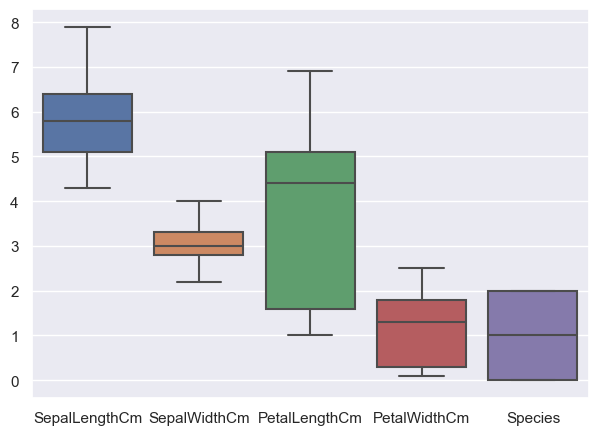

In [32]:
sns.boxplot(data = iris)

In [ ]:
""" On remarque qu'il n'y a plus de valeur aberrante.
"""

Fractionnement du jeu de données pour l’entrainement et le test

Traintest - Nettoyage - Encodage

In [89]:
from sklearn.model_selection import train_test_split
data=pd.read_csv('Iris_save.csv')

# Suppression des colonnes inutiles
cols = ['PetalLengthCm','PetalWidthCm','Species']
df = data[cols]
#df.head()

trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [91]:
print(trainset['Species'].value_counts())
print("\n")
print(testset['Species'].value_counts())

Iris-virginica     44
Iris-setosa        39
Iris-versicolor    37
Name: Species, dtype: int64


Iris-versicolor    13
Iris-setosa        11
Iris-virginica      6
Name: Species, dtype: int64


In [92]:
for col in df.select_dtypes('object'):
    print(f"{col:-<50} {df[col].unique()}")

Species------------------------------------------- ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Encodage

In [93]:
def encodage(df):
    """Fonction d'encodage de valeur"""
    code = {'Iris-setosa':0,
            'Iris-versicolor':1,
            'Iris-virginica':2}
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
    return df 

Suppression de valeur nulle

In [94]:
def imputation(df):
    """Suppression de valeur nulle"""
    return df.dropna(axis=0)

Fonction de Preprocessing

In [95]:
def preprocessing(df):
    df = encodage(df)
    df = imputation(df)
    x = df.drop('Species', axis=1)
    y = df['Species']
    #print(y.value_counts())
    return x, y

In [96]:
x_train, y_train = preprocessing(trainset)
y_train

137    2
84     1
27     0
127    2
132    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: Species, Length: 120, dtype: int64

In [97]:
x_test, y_test = preprocessing(testset)

Classer les Fleurs IRIS (KNN)

In [98]:
#y = df['iris']
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
k_range = range(1,20)
scores = {}
scores_list = []

In [99]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

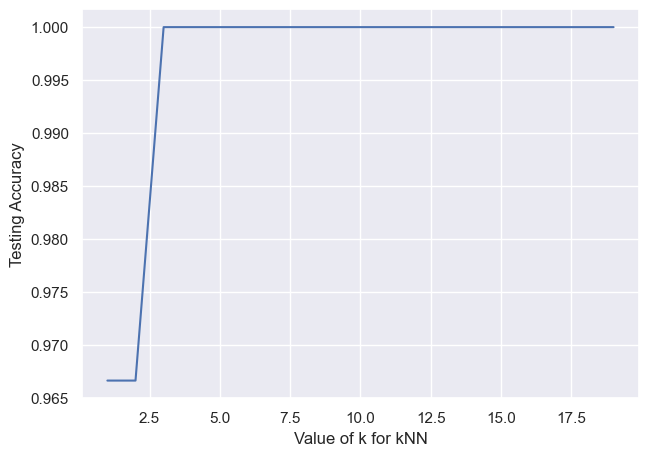

In [100]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of k for kNN')
plt.ylabel('Testing Accuracy')

In [101]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Apportons de nouvelles valeurs à notre modele et observons la sortie

In [152]:
#x_test = [[2,4],[5,1]]
y_predict = knn.predict(x_test)
acc_test = knn.score(x_test,y_test)
print("acc Test:",acc_test)

print("prediction for values:")
print(f"{x_test.iloc[[9]]}   is:",y_predict[9])
#print("prediction for values:",x_test.iloc[[1]],"is: ",y_predict[1])
        

acc Test: 1.0
prediction for values:
    PetalLengthCm  PetalWidthCm
71            4.0           1.3   is: 1
